In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Placeholder data for demonstration purposes
X = pd.DataFrame({
    'Age': [25, 30, 35, 40],
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Income': [50000, 60000, 70000, 80000]
})

y = pd.Series([0, 1, 1, 0])

# Create a copy of X
X_encoded = X.copy()

# Perform one-hot encoding on the 'Gender' column
encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(X_encoded[['Gender']])
gender_categories = encoder.categories_[0]
X_encoded.drop('Gender', axis=1, inplace=True)

# Create new columns for the encoded categories
for i, category in enumerate(gender_categories):
    X_encoded['Gender_' + category] = gender_encoded[:, i]

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a random forest classifier object with tuned hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,  # Adjust the maximum depth as needed
    min_samples_split=2,  # Adjust the minimum samples required to split a node as needed
    random_state=42
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Accuracy: 0.7666666666666667


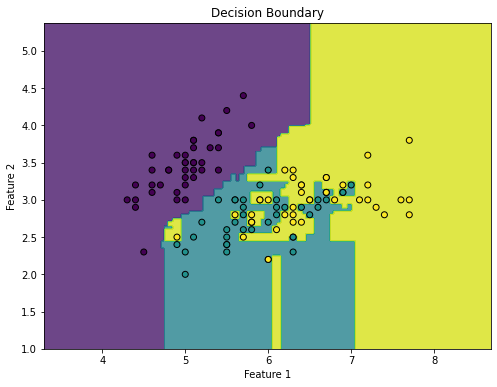

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def plot_decision_boundary(X, y, classifier):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')


# Load the Iris dataset as an example
iris = load_iris()
X = iris.data[:, :2]  # Select only the first two features for simplicity
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_train, y_train, rf_classifier)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def plot_decision_boundary(X, y, classifier):
    # ... (same as before) ...

# Load the Iris dataset as an example
        iris = load_iris()
        X = iris.data[:, :2]
        y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data with a progress bar
with tqdm(total=rf_classifier.n_estimators, desc="Training") as pbar:
    for _ in range(rf_classifier.n_estimators):
        rf_classifier.fit(X_train, y_train)
        pbar.update(1)
        pbar.set_postfix({'Accuracy': accuracy_score(y_test, rf_classifier.predict(X_test))})

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_train, y_train, rf_classifier)
plt.show()

Training: 100%|██████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.95it/s, Accuracy=0.767]

Accuracy: 0.7666666666666667


<Figure size 576x432 with 0 Axes>